# RFM Analizi-MÜŞTERİ SEGMENTASYONU

#### **RFM nedir?**

* *Recency, Frequency, Monetary* kelimelerinin baş harflerinden oluşup, bu üç metriğin hesaplanmasından sonra birleştirilmesiyle meydana gelen bir skordur. Müşterilerin mevcut durumunun analiz edilip, bu skorlara göre segmentlere ayrılmasına yardımcı olur.

* **Recency:** Müşterinin ne kadardır websitesinden/mağazadan hizmet aldığı, ne zamandır bize üye olduğu gibi bilgileri verir. Hesaplanması genellikle, bugünden son üyelik tarihi/son sipariş tarihinin çıkartılmasıyla elde edilir.

* **Frequency:** Müşterinin ne sıklıkla alışveriş yaptığını, ne sıklıkla siteye giriş yaptığını gösteren metriktir. Genellikle sipariş numarası/sipariş kodunun saydırılmasıyla sonuç verir.

* **Monetary:** Müşterinin harcamalarının toplamıdır. E-ticaret sitesine getirdiği ciro, aldığı hizmetler sonrası toplanan getiri olarak da tanımlanabilir. Ciro tanımı ne ise, müşteri bazında hayatı boyunca yapılan harcamalar toplanarak hesaplanır.*

#### Bu Çalışmada da Online Retail veri seti üzeriden RFM metrikierinin heplanıp RFM analizi yapılacak ve Müşteirleri Segmentlere ayırmaya çalışacağım


#### **Online retail** veir seti satış verilerini barıdndırmaktadır. Her bir gözlem ürün bazında bilgi içermektedir. Yani bir gözlem alınan bir ürünün hangi kişi tarafından  ve kişinin hangi alışverişi olduğunu ifade eden fatura numaraları ve tarihlerini vb. bilgileri  barındırmaktadır.

* **Invoice:** Satılan ürünü içeren faturanın numarasını ifade etmektedir.
* **StockCode:** Her bir ürünün numarasını ifade etmektedir.
* **Description:** Ürünlerin Tanımı
* **Quantity:** ilgili alınan ürünün ne kadar alındığını ifade eder
* **InvoiceDate:** Ne zaman alındığını, fatura tarihini ifade eder
* **UnitPrice:** İlgili alınan ürünün hangi fiyattan alındığını ifade eder
* **CustomerID:** İlgili ürünü alan müşterinin numarasıdır (ID)
* **Country:** İlgili ürünü alan müşterinin Ülkesi

## Kütüphaneler ve Veri Seti

In [527]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython.display as display
from PIL import Image

import time
from datetime import date
import datetime
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Uyarlıarı göz ardı et
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Veri Setini Okuma
df_ = pd.read_excel("online_retail_II.xlsx",
                    sheet_name="Year 2009-2010")

df = df_.copy()

In [452]:
df = df_.copy()

In [453]:
# Veri Setini Çalışmaya uygun duruma getirmek için Bazı değelerden kurtarıyorum

# Faturanın başında C olanlar iadeyi ifade ediyor. Bunların atılması gerekli
df=df[~df["Invoice"].str.contains("C",na=False)] # Invooicenin  başında C olanlar geri iadeyi ifaade ediyor dolayısı ile bunları veriden atarak anali devam edeceğim

# Miktarı 0 olanlar aykırı bir durum. Bunların atılması gerekli ve Customer ID leri olmayan gözlelerin de atılması gerekli
df=df[df["Quantity"]>0]
df.dropna(subset=["Customer ID"],inplace=True)

#

In [454]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [455]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [456]:
df.shape

(407695, 8)

### Veriyi inceleme

In [457]:
# Eşsiz Ürün sayısı
df["StockCode"].nunique()

4017

In [458]:
# Her bir üründen kaçartane satılmış
df["StockCode"].value_counts().sort_values(ascending=False)

85123A    3153
85099B    1742
22423     1706
21212     1586
21232     1407
          ... 
35915A       1
47569        1
47556        1
47554        1
90187A       1
Name: StockCode, Length: 4017, dtype: int64

In [711]:
# Eşsiz Müşteri Sayısı
df["Customer ID"].nunique()

4314

#### Müşterilere Göre inceleme

In [738]:
# Müşterilerin yaptıkları alışveriş sayısı, aldıkları ürün çeşidi sayısı ve  toplam ürün adedi miktarı
df.groupby(["Customer ID"]).agg({"Invoice":"nunique","StockCode":"nunique","Quantity":"sum"}).sort_values("Invoice",ascending=False)

Invoice  StockCode  Quantity
Customer ID                              
14911.0          205       1741     69722
17850.0          155        100     21052
12748.0          144       1343     13362
15311.0          121        594     32816
13089.0          109        474     29164
...              ...        ...       ...
13500.0            1         20       229
16100.0            1         37       438
16095.0            1         30       265
13508.0            1         16       156
13370.0            1         39       343

[4314 rows x 3 columns]

In [722]:
# toplamda gerçekleşen alışveriş sayısı
df["Invoice"].nunique()

19215

In [723]:
# Hangi Üründen toplamda kaç tane satıldı
df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False)

StockCode
21212      57570
85123A     56915
84077      54754
85099B     48802
17003      48166
           ...  
21772          1
21767          1
84814A         1
84845A         1
TEST002        1
Name: Quantity, Length: 4017, dtype: int64

In [724]:
# Ürün başına toplam getirinin hesaplanması ve df'e kaydedilmesi
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [726]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalPrice  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom        30.0   

  InvoiceDate_DAY InvoiceDate_Month  
0      2009-12-01           2009-12  
1      2009-12-01           2009-12  
2      2009-12-01           2009-12  
3      2009-12-01           2009-12  
4      2009-12-01           2009-12

#### Ülkeler Göre inceleme

In [709]:
# Ülkelerden yapılan alışveriş sayısı, alınan ürün sayısı, ve ortalama ve toplam bıraktıkları paralar
country_df =df.groupby(["Country"]).agg({"Customer ID":"nunique","Invoice":"nunique","StockCode":"nunique","TotalPrice":["count","sum","mean"]}).sort_values(("TotalPrice","sum"),ascending=False).reset_index().droplevel(level=1,axis =1)
country_df.columns = ['Country',"num_customer", 'num_Invoice', 'num_Product','tot_quantity', 'TotalPrice', 'Average_Price']
country_df.head()

Country  num_customer  num_Invoice  num_Product  tot_quantity  \
0  United Kingdom          3971        17614         4001        370951   
1            EIRE             5          316         1999          8507   
2     Netherlands            22          135          879          2730   
3         Germany            67          347         1457          7661   
4          France            47          236         1275          5470   

     TotalPrice  Average_Price  
0  7.414756e+06      19.988505  
1  3.560852e+05      41.857906  
2  2.687860e+05      98.456410  
3  2.023953e+05      26.418917  
4  1.462154e+05      26.730424

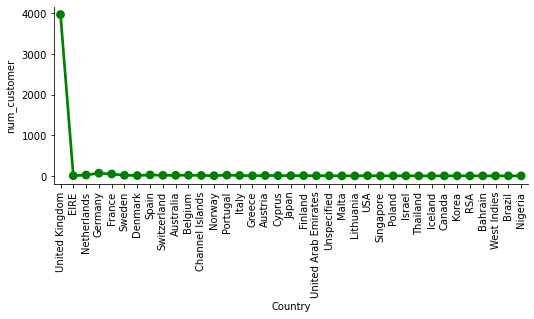

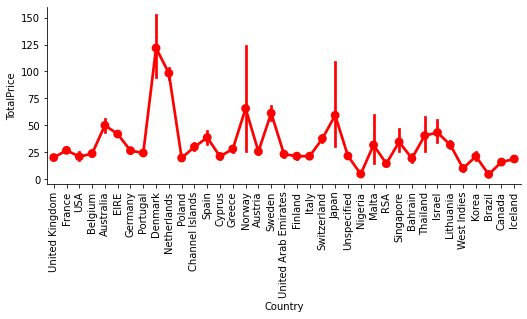

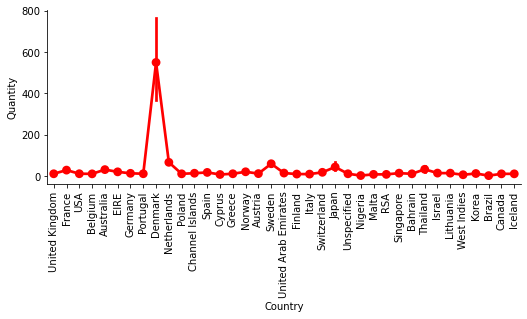

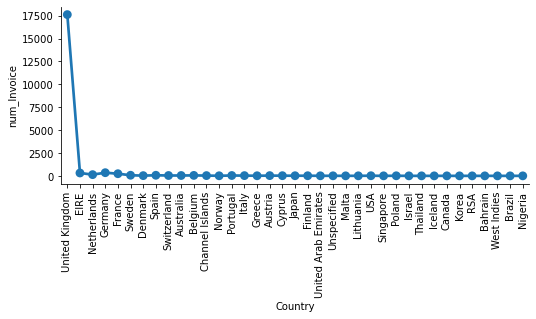

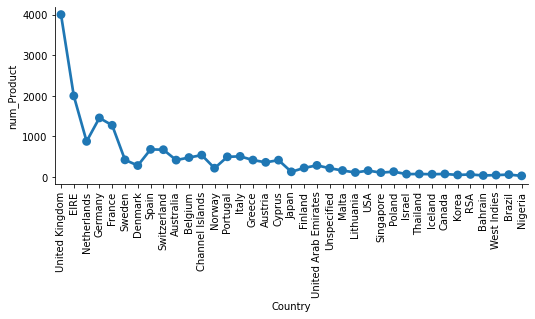

In [759]:
# Ülkelere Göre Bazı değerlerin görseleştirilmesi

# Toplam Müşteri 
sns.catplot(x="Country", y="num_customer",data=country_df,kind="point",color="g",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()
# Fiyat ortalaması
sns.catplot(x="Country", y="TotalPrice", data=df,kind="point",color="r",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()

# Miktar ortalaması
sns.catplot(x="Country", y="Quantity", data=df,kind="point",color="r",height=3, aspect=2.5)
plt.xticks(rotation=90);            
plt.show()

# Alışveriş Sayısı
sns.catplot(x="Country", y="num_Invoice",data=country_df,kind="point",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()

# Ürün çedşidi  Sayısı
sns.catplot(x="Country", y="num_Product",data=country_df,kind="point",height=3, aspect=2.5)
plt.xticks(rotation=90);
plt.show()

### Verinin Tarihe göre incelenmesi

In [577]:
# Saatli olan tarihleri günlüğe çevirdim
df["InvoiceDate_DAY"]=df["InvoiceDate"].apply(lambda x: datetime.date(x.year,x.month,x.day))
df["InvoiceDate_DAY"]= pd.to_datetime(df["InvoiceDate_DAY"])
# Aylık periyotlarıyakalama
df["InvoiceDate_Month"]=df["InvoiceDate"].dt.to_period('M')
date_mont_df["InvoiceDate_Month"]=date_mont_df["InvoiceDate_Month"].astype("str")

In [744]:
# Kaç günlük veri var
df["InvoiceDate_DAY"].nunique()

307

In [752]:
# Veriyi Günlük olarak Çevirdim
date_df=df.groupby("InvoiceDate_DAY").agg({"Invoice":"nunique","StockCode":"nunique" ,"Quantity":"sum","TotalPrice":"sum"}).reset_index()
date_df

InvoiceDate_DAY  Invoice  StockCode  Quantity  TotalPrice
0        2009-12-01       98       1042     24437    44048.69
1        2009-12-02      110       1087     29783    52941.99
2        2009-12-03      122       1082     48033    67479.08
3        2009-12-04       80       1006     20069    34064.41
4        2009-12-05       30        285      5119     9803.05
..              ...      ...        ...       ...         ...
302      2010-12-05       87       1142     16450    31771.60
303      2010-12-06       94        916     16291    31215.64
304      2010-12-07       71        630     19444    53795.31
305      2010-12-08      111        932     21573    39248.82
306      2010-12-09       98        886     17415    38231.90

[307 rows x 5 columns]

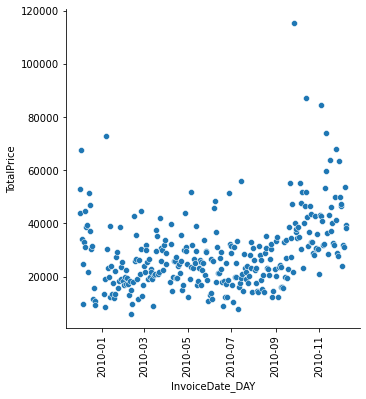

In [605]:
sns.relplot(x="InvoiceDate_DAY", y= "TotalPrice", data = date_df)
plt.xticks(rotation=90);                
plt.show()

In [753]:
# Veiyi Aylık periyoda Çevirdim
date_month_df=df.groupby("InvoiceDate_Month").agg({"Invoice":"nunique","StockCode":"nunique" ,"Quantity":"sum","TotalPrice":"sum"}).reset_index()
date_month_df

InvoiceDate_Month  Invoice  StockCode  Quantity   TotalPrice
0            2009-12     1512       2725    400201   686654.160
1            2010-01     1011       2368    370967   557319.062
2            2010-02     1106       2375    372771   506371.066
3            2010-03     1524       2668    503467   699608.991
4            2010-04     1329       2340    352042   594609.192
5            2010-05     1377       2377    386297   599985.790
6            2010-06     1497       2494    391682   639066.580
7            2010-07     1381       2391    325661   591636.740
8            2010-08     1293       2474    453590   604242.650
9            2010-09     1689       2526    569265   831615.001
10           2010-10     2133       2650    598588  1036680.000
11           2010-11     2587       2797    656324  1172336.042
12           2010-12      776       2000    158369   311878.000

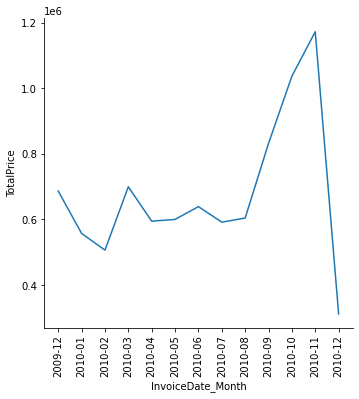

In [607]:
# Aylık Toplam Ciro
sns.relplot(x=date_mont_df["InvoiceDate_Month"].astype("str"), y= "TotalPrice", data = date_mont_df,kind="line")
plt.xticks(rotation=90);

## RFM Metriklerinin Hesaplanması

* **RFM Skoru 555 olanlar en iyi 111 olanlar ise en kötü skor olmaktadır. Buradaki her bir rakam Recency, Frequency ve Monetary metrikelrinden gelmektedir. Her bir Metrik 1-5 arasında skorlanmaktadır.**
* **Recancy değeri yüksek olanara düşük skor 1, düşük olanlara yüksek skor 5 verilmektedir.**
* **Monetary ve Frequancy değeleri yüksek olanara yüksek skor 5, düşük olanlara ise düşük skor 1 verilmektedir**

* **3 Metrikten de gelen skorlar yanyana konarak Genel RFM skoru elde edilir.**

* **Dolayısı ile bu skorlar birleştirilince  1 ile 5 arasondaki sayıların üçlü kombinasyonları elde edilmekte ve 111 ve 555 arasında genel skor gösterimleri oluşmaktadır**

#### RFM dataframeini oluşturma

In [220]:
# rfm adında boş dataframe luşturdum
rfm = pd.DataFrame()
# today date adında  en son alışverişten 2 gün sonrayı tuttum
today_date =df["InvoiceDate"].max()+timedelta(days=2) # 
# rfm dataframeni oluşturdum
rfm[["Recency", "Frequency", "Monetary"]]=df.groupby("Customer ID").agg({
                                                "InvoiceDate": lambda date: (today_date-date.max()).days,
                                                 "Invoice": lambda num:len(num),
                                                  "TotalPrice": lambda price: sum(price)})

In [221]:
# Monetary değeri ya da Frequancy değeri 0 olan gözlemin olmaması gerekli. Bu sebeple 0 olanları çıkarıyorum
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [222]:
rfm.head()

Recency  Frequency  Monetary
Customer ID                              
12346.0          166         33    372.86
12347.0            4         71   1323.32
12348.0           75         20    222.16
12349.0           44        102   2671.14
12351.0           12         21    300.93

#### Hesaplanan RFM Metriklerini Skorlayalım

In [223]:
# Recency Skor: En düşük olana en yüksek skor
rfm["RecencyScore"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])

In [224]:
# Frequency Skor: En büyük olanlara en yüksek skor
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])

In [225]:
# Monetary Skor: Monetaryisi en yüksek olonlara en yüksek skor
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"],5, labels=[1,2,3,4,5])

In [226]:
rfm.head()

Recency  Frequency  Monetary RecencyScore FrequencyScore  \
Customer ID                                                             
12346.0          166         33    372.86            2              3   
12347.0            4         71   1323.32            5              4   
12348.0           75         20    222.16            2              2   
12349.0           44        102   2671.14            3              4   
12351.0           12         21    300.93            5              2   

            MonetaryScore  
Customer ID                
12346.0                 2  
12347.0                 4  
12348.0                 1  
12349.0                 5  
12351.0                 2

In [227]:
# RFM Skorlarının birleştirilerek Skor gösteriminin elde edilmesi

rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [228]:
rfm.head()

Recency  Frequency  Monetary RecencyScore FrequencyScore  \
Customer ID                                                             
12346.0          166         33    372.86            2              3   
12347.0            4         71   1323.32            5              4   
12348.0           75         20    222.16            2              2   
12349.0           44        102   2671.14            3              4   
12351.0           12         21    300.93            5              2   

            MonetaryScore RFM_SCORE  
Customer ID                          
12346.0                 2       232  
12347.0                 4       544  
12348.0                 1       221  
12349.0                 5       345  
12351.0                 2       522

In [242]:
# 3 metrikde de 5 5 5v skora dahip mmüşteriler
rfm[rfm["RFM_SCORE"] =="555"].head()

Customer ID  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
50      12415.0       12        212  19543.84            5              5   
63      12431.0       10        170   4370.52            5              5   
64      12433.0        3        286   7205.39            5              5   
87      12471.0       11        678  20139.74            5              5   
88      12472.0        6        572  11308.48            5              5   

   MonetaryScore RFM_SCORE    Segment  
50             5       555  Champions  
63             5       555  Champions  
64             5       555  Champions  
87             5       555  Champions  
88             5       555  Champions

In [243]:
# 3 metrikde de 1 1 1 skora sahip müşteriler
rfm[rfm["RFM_SCORE"] =="111"].head()

Customer ID  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
14      12362.0      375          1    130.00            1              1   
33      12392.0      228          7    234.75            1              1   
41      12404.0      319          1     63.24            1              1   
51      12416.0      293         11    202.56            1              1   
82      12466.0      319          1     56.73            1              1   

   MonetaryScore RFM_SCORE      Segment  
14             1       111  Hibernating  
33             1       111  Hibernating  
41             1       111  Hibernating  
51             1       111  Hibernating  
82             1       111  Hibernating

#### Hesaplanan RFM Skorlarını İsimlendirelim

* **RFM metriklerinden Recency ve Frequency skorlarına göre iki boyutlu oluşturulmuş RFM tablosunda yararlanılarak segmentasyon yapılmaktadır**
* **Dolayısı ile bu tagbloya göre recency ve frequency skorlarına göre segment gruplarını rfm dataframeine atamam gerekiyor**

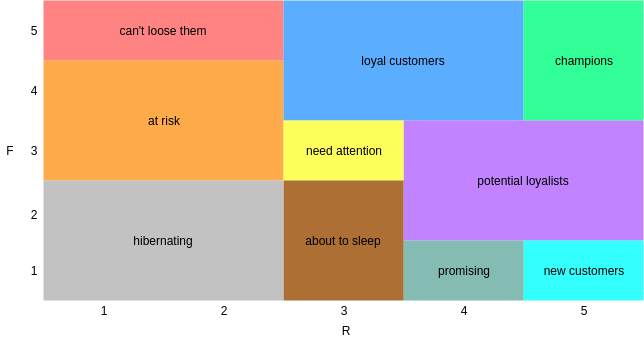

In [742]:
# Read Images 
image_path = 'RFM Analizi Tablosu.png'
display.display(Image.open(image_path))

In [230]:
# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}


In [231]:
# rfm segmentine bu isimleri recency ve frequency skorlarına göre atama işlemini yapıyorum
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

rfm.reset_index(inplace=True)

In [232]:
rfm.head()

Recency  Frequency  Monetary RecencyScore FrequencyScore  \
Customer ID                                                             
12346.0          166         33    372.86            2              3   
12347.0            4         71   1323.32            5              4   
12348.0           75         20    222.16            2              2   
12349.0           44        102   2671.14            3              4   
12351.0           12         21    300.93            5              2   

            MonetaryScore RFM_SCORE              Segment  
Customer ID                                               
12346.0                 2       232              At_Risk  
12347.0                 4       544            Champions  
12348.0                 1       221          Hibernating  
12349.0                 5       345      Loyal_Customers  
12351.0                 2       522  Potential_Loyalists

#### Son Oluşan RFM Verisini Biraz İnceleyelim

In [379]:
rfm.head()

Customer ID  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
0      12346.0      166         33    372.86            2              3   
1      12347.0        4         71   1323.32            5              4   
2      12348.0       75         20    222.16            2              2   
3      12349.0       44        102   2671.14            3              4   
4      12351.0       12         21    300.93            5              2   

  MonetaryScore RFM_SCORE              Segment  
0             2       232              At_Risk  
1             4       544            Champions  
2             1       221          Hibernating  
3             5       345      Loyal_Customers  
4             2       522  Potential_Loyalists

In [449]:
 rfm.groupby("Segment").agg({"MonetaryScore":"mean","FrequencyScore":"median","RecencyScore":"mean","Customer ID":"count","Recency":"mean","Frequency":"mean", "Monetary":"mean"}).reset_index()


Segment  MonetaryScore  FrequencyScore  RecencyScore  \
0       About_to_Sleep       1.953488               2      3.000000   
1              At_Risk       3.053726               3      1.611785   
2           Cant_Loose       4.343434               5      1.777778   
3            Champions       4.414557               5      5.000000   
4          Hibernating       1.772152               1      1.407011   
5      Loyal_Customers       4.135834               4      3.560155   
6       Need_Attention       3.078313               3      3.000000   
7        New_Customers       1.954545               1      5.000000   
8  Potential_Loyalists       2.765504               3      4.403101   
9            Promising       1.767857               1      4.000000   

   Customer ID     Recency   Frequency     Monetary  
0          344   54.543605   16.107558   447.839826  
1          577  166.053726   59.564991  1180.625170  
2           99  129.868687  220.646465  3002.426980  
3          632    8.039557  273.354430  6964.077188  
4         1027  207.059396   14.516066   461.186768  
5          773   38.401035  168.276843  2662.046864  
6          166   54.680723   45.271084   935.626627  
7           66    8.757576    7.818182   482.087121  
8          516   19.439922   37.203488  1024.276880  
9          112   25.991071    8.616071   456.508214

In [761]:
# RFM_Segment tablosunu oluşturdum
rfm["RecencyScore"]=rfm["RecencyScore"].astype("int")
rfm["MonetaryScore"]=rfm["MonetaryScore"].astype("int")
rfm["FrequencyScore"]=rfm["FrequencyScore"].astype("int")

rfm_segment = rfm.groupby("Segment").agg({"MonetaryScore":"mean","FrequencyScore":"mean","RecencyScore":"mean","Customer ID":"count","Recency":"mean","Frequency":"mean", "Monetary":"mean"}).reset_index()

rfm_segment.columns=['Segment', 'MonetaryScore', 'FrequencyScore', 'RecencyScore',
       'Number_of_Customer', 'Recency', 'Frequency', 'Monetary']

rfm_segment[["MonetaryScore","FrequencyScore","RecencyScore"]] = round(rfm_segment[["MonetaryScore","FrequencyScore","RecencyScore"]] )


rfm_segment = rfm_segment[['Segment','Number_of_Customer', 'RecencyScore','FrequencyScore', 'MonetaryScore', 
        'Recency', 'Frequency', 'Monetary']]

In [762]:
rfm_segment

Segment  Number_of_Customer  RecencyScore  FrequencyScore  \
0       About_to_Sleep                 344           3.0             2.0   
1              At_Risk                 577           2.0             3.0   
2           Cant_Loose                  99           2.0             5.0   
3            Champions                 632           5.0             5.0   
4          Hibernating                1027           1.0             1.0   
5      Loyal_Customers                 773           4.0             4.0   
6       Need_Attention                 166           3.0             3.0   
7        New_Customers                  66           5.0             1.0   
8  Potential_Loyalists                 516           4.0             3.0   
9            Promising                 112           4.0             1.0   

   MonetaryScore     Recency   Frequency     Monetary  
0            2.0   54.543605   16.107558   447.839826  
1            3.0  166.053726   59.564991  1180.625170  
2            4.0  129.868687  220.646465  3002.426980  
3            4.0    8.039557  273.354430  6964.077188  
4            2.0  207.059396   14.516066   461.186768  
5            4.0   38.401035  168.276843  2662.046864  
6            3.0   54.680723   45.271084   935.626627  
7            2.0    8.757576    7.818182   482.087121  
8            3.0   19.439922   37.203488  1024.276880  
9            2.0   25.991071    8.616071   456.508214

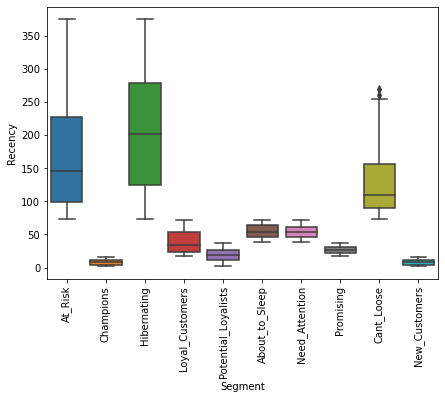

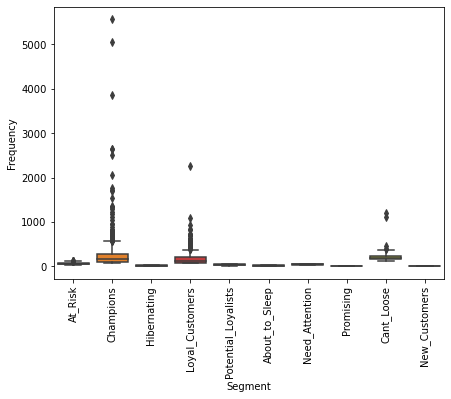

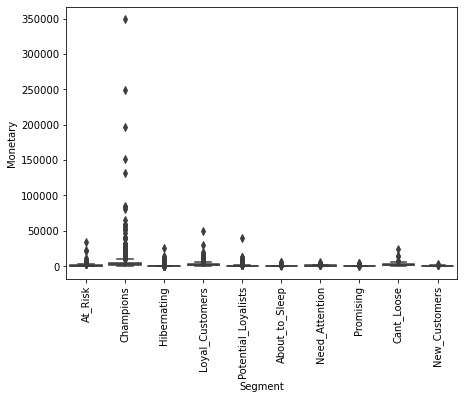

In [310]:
# Segmentlere Göre Recency Frequency ve Monatary dağolımlarınıa bakalım
cols =["Recency","Frequency","Monetary"]
for i in range(3):
    plt.subplots( figsize=(7, 5))
    sns.boxplot(x="Segment",y= cols[i],data=rfm)
    plt.xticks(rotation=90);
    plt.show()

In [311]:
rfm.head()

Customer ID  Recency  Frequency  Monetary RecencyScore FrequencyScore  \
0      12346.0      166         33    372.86            2              3   
1      12347.0        4         71   1323.32            5              4   
2      12348.0       75         20    222.16            2              2   
3      12349.0       44        102   2671.14            3              4   
4      12351.0       12         21    300.93            5              2   

  MonetaryScore RFM_SCORE              Segment  
0             2       232              At_Risk  
1             4       544            Champions  
2             1       221          Hibernating  
3             5       345      Loyal_Customers  
4             2       522  Potential_Loyalists

In [769]:
rfm_segment = rfm.groupby("Segment").agg({"Customer ID":"count", "Recency":"mean", "Frequency":"mean", "Monetary":"mean"})
rfm_segment.columns=['n_Customer', 'Recency', 'Frequency', 'Monetary']

In [775]:
rfm_segment

n_Customer     Recency   Frequency     Monetary
Segment                                                             
About_to_Sleep              344   54.543605   16.107558   447.839826
At_Risk                     577  166.053726   59.564991  1180.625170
Cant_Loose                   99  129.868687  220.646465  3002.426980
Champions                   632    8.039557  273.354430  6964.077188
Hibernating                1027  207.059396   14.516066   461.186768
Loyal_Customers             773   38.401035  168.276843  2662.046864
Need_Attention              166   54.680723   45.271084   935.626627
New_Customers                66    8.757576    7.818182   482.087121
Potential_Loyalists         516   19.439922   37.203488  1024.276880
Promising                   112   25.991071    8.616071   456.508214

### **Alttaki RFM TAblosu ile Alttaki pointplot grafiğini beraber incelediğiizzde iki boyutlu RFM tablosunun yanında Monetary ortalama değerini gözlemleyebiliyoruz**

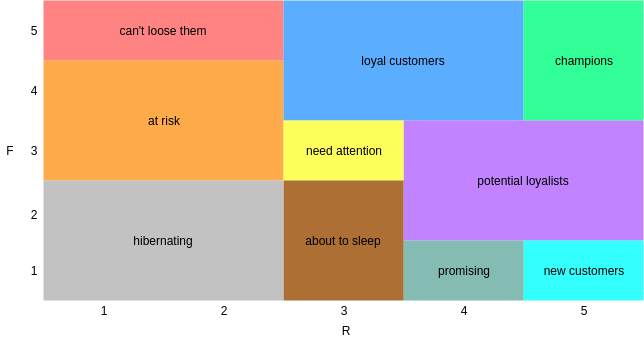

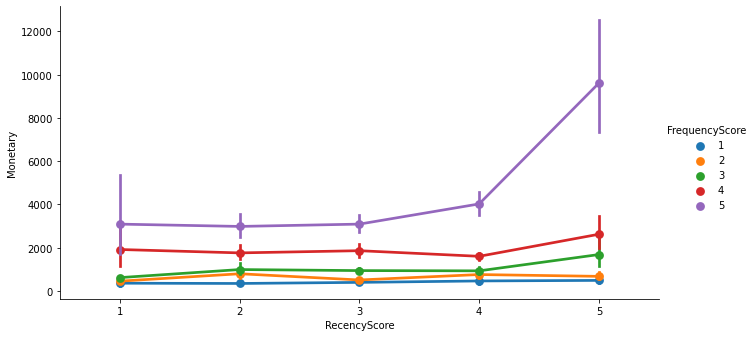

In [626]:
image_path = 'RFM Analizi Tablosu.png'
display.display(Image.open(image_path))

# Recency ve Frequency skorlarına göre monetary ortalaması
# Yatayda Recency skor ve dikeyde de Frequency skorlara göre Monetary ortalamasını göstermek amaçlı çizdirdim
sns.catplot(x="RecencyScore", y="Monetary",data=rfm, kind="point", hue="FrequencyScore",  order=[1,2,3,4,5],height=4.6, aspect=2)
plt.show()

#### **Üstteki grafiğe Baktığımızda Recency ve Frequency skorlara göre monetary ortalaması  değerinde skorların durumuna öre keskin bir farklılığın olmadığını gördüm. Ama Recency ve Frequency skorların 5,5 olduğu noktada monetary ortalaması aşırı yüksek iken diğer durumlarda birbirine yakın seyretmekte. Bu durum biraz monetary değerlerindeki aykırı yüksek değerlerden kaynaklandığını düşünüyorum. Bu durumu gözlemleme kiçin monetary skoru recency ve frequency skorlaa göre ayrı ayrı incelemek istedim. Alttaki çıktılarda iki grafik monetary skorun diğer skorlara göe incelenmesini göstermektedir.**

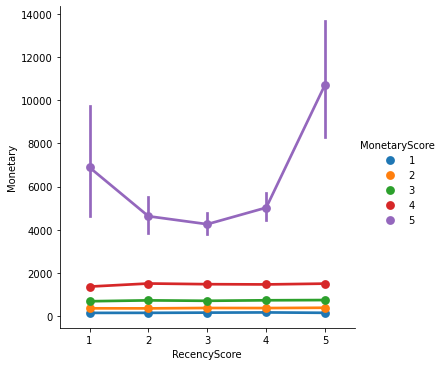

In [409]:
# Monetary skorun Recency skora göre incelenmesi
sns.catplot(x="RecencyScore", y="Monetary",data=rfm, kind="point", hue="MonetaryScore",order=[1,2,3,4,5])

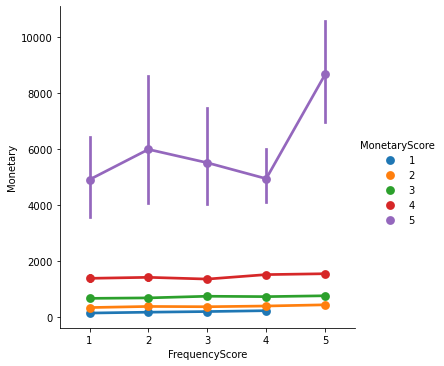

In [408]:
# Monetary skorun Frequency skora göre incelenmesi
sns.catplot(x="FrequencyScore", y="Monetary",data=rfm, kind="point", hue="MonetaryScore",order=[1,2,3,4,5])

#### **Üstteki iki grafiğe bakrığımızda Recency skoru ve  frequency skorunun monetary skoaru 1 2 3 4 olan monetarylara  bir etkisinin olmadığını ama monetray skoru 5 olnalara bir etkisini olduğunu görebilmekteyiz.**